# Figures

by Hannah Bohle, 27.06.2020


In [2]:
#where am I?
import os
path = os.getcwd()
print(path)

C:\Users\hanna\PycharmProjects\berlin_datascience_lab\berlin_datascience_lab\exploration\01_EDA


In [3]:
#go to path where data_prep and baseline_model are
%cd C:\Users\hanna\PycharmProjects\berlin_datascience_lab\berlin_datascience_lab

C:\Users\hanna\PycharmProjects\berlin_datascience_lab\berlin_datascience_lab


In [4]:
# imports and magic line
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

from emissionscheck_alb import data_prep, baseline_model


In [5]:
#go to data path locally 
%cd C:\Users\hanna\PycharmProjects\berlin_datascience_lab\berlin_datascience_lab\data

C:\Users\hanna\PycharmProjects\berlin_datascience_lab\berlin_datascience_lab\data


In [6]:
df = pd.read_csv("../data/sample.csv", lineterminator='\n')

c:\users\hanna\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (5,7,18,26,108,109,113) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


which columns do we have in our dataset?

In [7]:
#cols = df.columns.tolist()
#print(cols)
#df_subset=df

In [8]:
df.OVERALL_RESULT2 = df.OVERALL_RESULT.replace({"P":"PASS", "F": "FAIL", "A":"ABORT"})

c:\users\hanna\miniconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


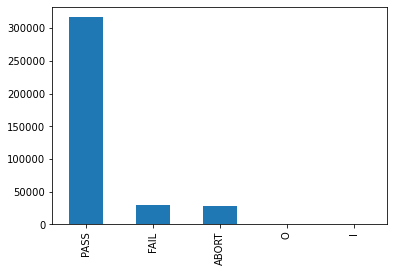

In [9]:
df.OVERALL_RESULT2.value_counts().plot(kind='bar')

In [10]:
# get car age
df = data_prep.get_car_age(df)
df.head()

,RecordID,RECORD_NUM,VIR_CERT_NUMBER,STATION_NUM,ANALYZER_NUM,INSPECTOR_NUM,TEST_TYPE,VID_TEST_TYPE,TEST_SDATE,TEST_EDATE,...,MECHANIC_LAST_NAME,MECHANIC_FIRST_NAME,MECHANIC_MIDDLE_INIT,ENGINE_SIZE_ORIG,FAILED_IDLE_RPM,SENTTOVID,Station_License_Number,Analyzer_Number,Insert_DateTime\r,CAR_AGE
0,111260,7408,4486883.0,IS329,W036,26351553,I,I,2004-12-16 10:57:00,2004-12-16 11:03:00,...,SANCHEZ,TIM,J,NaN,NaN,0.0,IS329,W036,2006-01-12 21:19:17\r,11
1,138031,969,4437994.0,IS267,W014,17496701,I,I,2004-08-13 14:10:00,2004-08-13 14:12:00,...,Trujillo,Vince,NaN,NaN,NaN,0.0,IS394,W014,2006-01-13 17:43:30\r,5
2,298121,185,NaN,IR354,W109,32641547,I,NaN,2004-08-31 13:03:00,2004-08-31 13:03:00,...,Anderson,Phillip,L,NaN,T,0.0,IR354,W109,2006-01-24 09:07:03\r,16
3,369185,4569,4469421.0,IS359,W042,11117229,I,I,2004-12-02 11:33:00,2004-12-02 11:39:00,...,NGUYEN,DUC,NaN,NaN,NaN,0.0,IS404,W042,2006-01-26 17:03:05\r,20
4,384955,1326,4492858.0,IS171,W052,22095231,I,I,2004-12-29 17:00:00,2004-12-29 17:03:00,...,Nguyen,Kenny,T,NaN,NaN,0.0,IS171,W052,2006-01-31 16:06:03\r,8


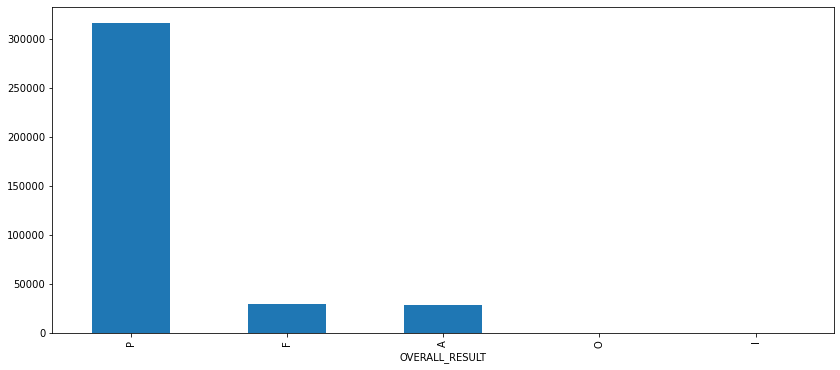

In [11]:
fig, ax = plt.subplots(figsize=(14,6))
df.groupby('OVERALL_RESULT').size().sort_values(ascending=False).head(60).plot.bar()

In [12]:
df.OVERALL_RESULT.value_counts()

P    316732
F     30051
A     28701
O        10
I         9
Name: OVERALL_RESULT, dtype: int64

In [13]:
# Keep rows with only P or F in OVERALL RESULT
df = data_prep.keep_pass_fail(df)

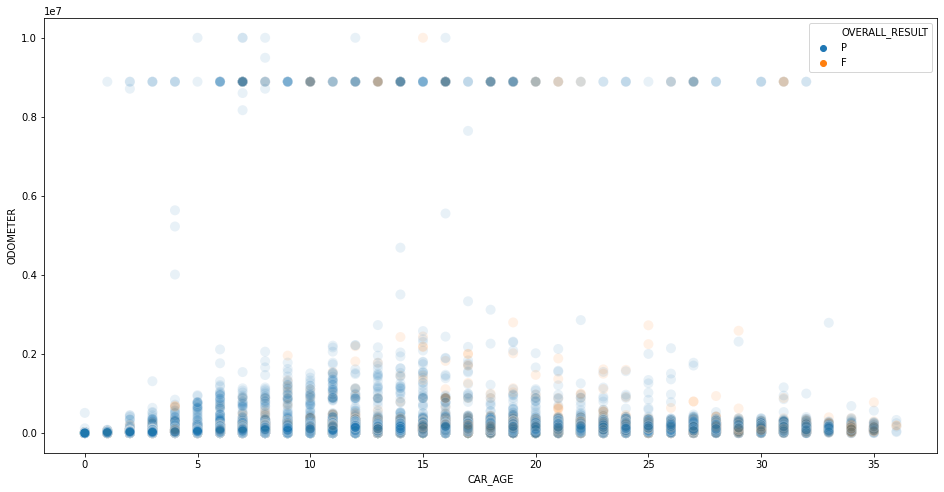

In [14]:
fig, ax = plt.subplots(figsize=[16,8])
sns.scatterplot(data=df, x='CAR_AGE', y='ODOMETER', hue='OVERALL_RESULT', s=100, alpha=.1)

In [17]:
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

In [18]:
show_values_on_bars(sns_t, "h", 0.3)

NameError: name 'sns_t' is not defined